In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip "/content/drive/My Drive/Hurricane Damage Dataset.zip" -d ""

Streaming output truncated to the last 5000 lines.
  inflating: train_another/no_damage/-95.627453_29.859303000000004.jpeg  
  inflating: train_another/no_damage/-95.62745600000001_29.777524.jpeg  
  inflating: train_another/no_damage/-95.627485_29.777865999999996.jpeg  
  inflating: train_another/no_damage/-95.62751800000001_29.857785999999997.jpeg  
  inflating: train_another/no_damage/-95.62751999999999_29.860796999999998.jpeg  
  inflating: train_another/no_damage/-95.627523_29.770004999999998.jpeg  
  inflating: train_another/no_damage/-95.62753000000001_29.863289.jpeg  
  inflating: train_another/no_damage/-95.627539_29.827047999999998.jpeg  
  inflating: train_another/no_damage/-95.627543_29.860021000000003.jpeg  
  inflating: train_another/no_damage/-95.627563_29.8628.jpeg  
  inflating: train_another/no_damage/-95.627579_29.864051.jpeg  
  inflating: train_another/no_damage/-95.627595_29.776602.jpeg  
  inflating: train_another/no_damage/-95.62759799999999_29.777317.jpeg  
  i

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import PIL
%matplotlib inline

In [ ]:
import os
def alot(path,x):
    arr=[]
    for files in os.listdir(path):
        img = cv2.imread(path+'/'+files)
        img = np.array(img)
        arr.append([img,x])
    return arr

test_damage=[]
x=1
path = '/content/test/damage'
test_damage=alot(path,x)

test_no_damage=[]
x=0
path='/content/test/no_damage'
test_no_damage=alot(path,x)

train_damage=[]
x=1
path='/content/train_another/damage'
train_damage=alot(path,x)


train_no_damage=[]
x=0
path='/content/train_another/no_damage/'
train_no_damage= alot(path,x)

In [ ]:
trainx, testx, trainy, testy = [],[],[],[]

In [ ]:
for features,label in train_damage:
  trainx.append(features)
  trainy.append(label)

for features,label in train_no_damage:
  trainx.append(features)
  trainy.append(label)

In [ ]:
for features,label in train_damage:
  testx.append(features)
  testy.append(label)

for features,label in train_no_damage:
  testx.append(features)
  testy.append(label)

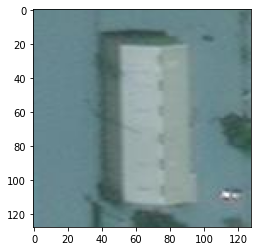

In [ ]:
plt.imshow(trainx[30])

In [ ]:
trainy[30]

1

In [ ]:
trainx = np.asarray(trainx)
testx = np.asarray(testx)
trainy = np.asarray(trainy)
testy = np.asarray(testy)


In [ ]:
trainx = trainx/255.0
testx= testx/255.0

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
type(testx)

numpy.ndarray

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(trainx, trainy, epochs=4,
                    validation_data=(testx, testy))

Epoch 1/4
313/313 [==============================] - ETA: 0s - loss: 0.4725 - accuracy: 0.7709

In [ ]:
recognizer=cv2.face.EigenFaceRecognizer_create()

NameError: ignored